# Machine Learning para Corretora

Dados de bairros da California,

In [1]:
import pandas as pd

O seguinte banco de dados, representa 10 atributos (colunas), para cada linha (bairro)

In [2]:
corretora = pd.read_csv('housing.csv')
corretora.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
corretora.info()  #uma rapida descrição dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# na info mostra que é um objeto (python)
corretora['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
corretora.describe() # mostra um sumário dos atributos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Breve descrição:

**count** indica o total , veja que no total_bedrooms falta bairros.

**mean** indica a média

**std** indica o desvio padrão

**25,50,75** indica percentagem, abaixo de qualquer um dos atributos, por exemplo: `housing_median_age` 25% para baixo tem 18


Uma outra forma de ver os dados, é fazer uma representação gráfica usando a função `hist()` um histograma que mostra o número de ocorrencias no eixo vertical que aconteceu num intervalo (no eixo horizontal).

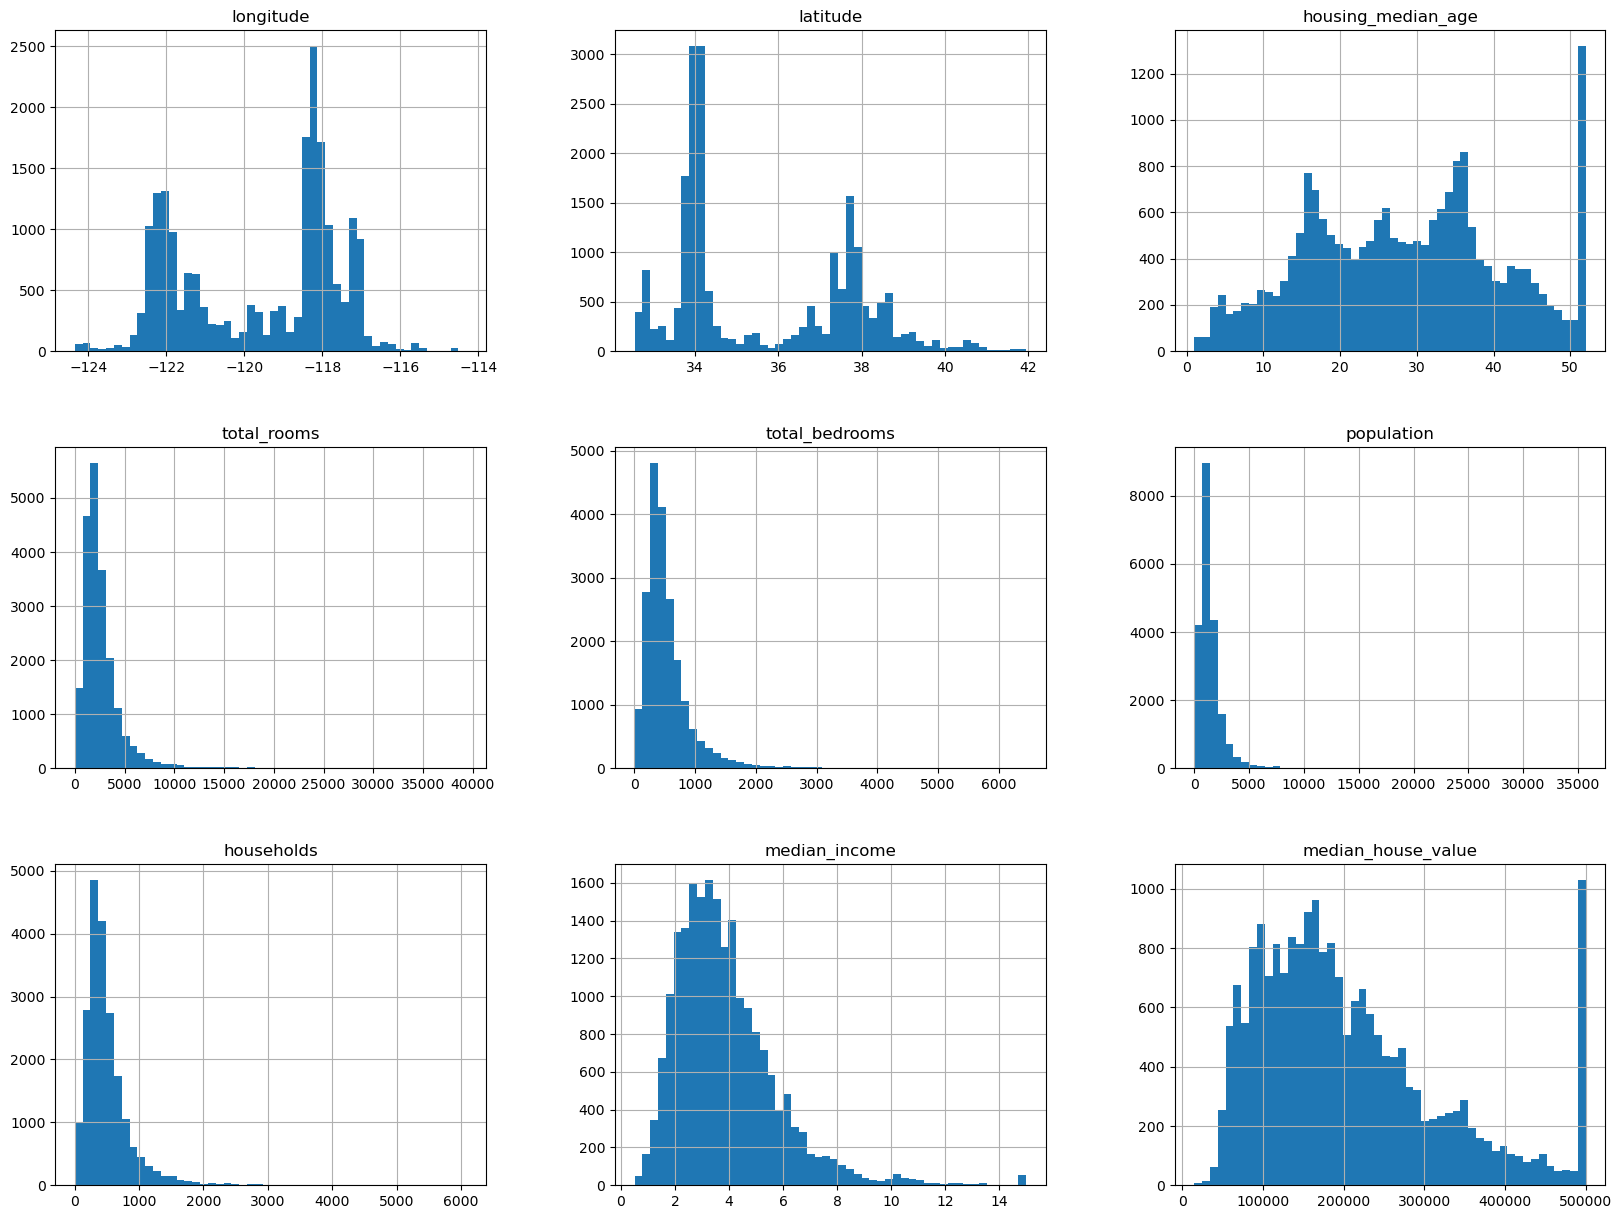

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
corretora.hist(bins=50, figsize=(20,15))
plt.show()

Standard deviation is generally denoted $\sigma$ (sigma), and it is the square root of the variance, which is the average of the squared deviation from the mean. When a feature has a bell-shaped normal distribution (also called a Gaussian distribution), which is very common, the '68-95-99.7' rule applies: about 68% of the values fall $1 \sigma$, $95\%$ within $2\sigma$, 99.7% whitin $3\sigma$

### Observações nos histogramas

- O `median_income` não está representado em dólares.
- O `housing_median_age` e o `median_house_value` forom limitados e isso significa o algoritmo do Machine learning deve de saber que não pode ultrapassar esse limite, mas se quiser valores preciso mesmo acima desse limite,pode-se optar por remover esse bairros dos 'conjunto de teste' e 'conjunto de treinamento'
- Os atributos tem escalas diferentes
- Em varios dos histogramas pode-se observar que há 'caldas muito longas', ou seja, os valore extendem-se muito à direita, isso pode dificultar alguns algoritmos do Machine learning ao detectar padrões.

## Criar o Conjunto de Teste

Separar os dados em um conjunto de teste, serve para 'testar'o  quão bom está o algoritmo. Bom mesmo é evitar ver esse dados, pois o cérebro humano tem uma grande capacidade em encontrar padrões, isso pode afetar na hora de 'calibrar' o algoritmo.

In [7]:
import numpy as np

def split_treino_teste(dados,test_ratio):
    shuffled_indices = np.random.permutation(len(dados))
    test_set_size = int(len(dados) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return dados.iloc[train_indices],dados.iloc[test_indices]

In [8]:
set_treino, set_teste = split_treino_teste(corretora, 0.2) #separando 20% para 'conjunto de teste'

In [9]:
len(set_treino)

16512

In [10]:
len(set_teste)

4128

⚠️ há um problema, cada vez que 'rodar' a função, criará um novo conjunto, consequentemente, verá todos os dados do conjunto, duas alternativas.

- salvar os conjunto assim que roda a função, e depois carregar individualmente os arquivos.
- Ou, computar um hash para cada identificação de cada caso ou linha. Bora testar essa!

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
treino_set, teste_set = train_test_split(corretora, test_size=0.2, random_state=42)

In [13]:
len(treino_set)

16512

In [14]:
len(teste_set)

4128

Supondo que expertos dizeram que a **mediana** é importante para predecir preços das casas. Agora vamos ver a **mediana do rendimento** `median_income`, no gráfico pode-se observar que a maioria está entre $0-6$. A função `cut()`do pandas, que separa por categorias,depois veremos o histograma deste.

In [15]:
corretora["income_cat"] = pd.cut(corretora["median_income"],
                                 bins = [0., 1.5, 3.0, 4.5, 6. ,np.inf],
                                 labels = [1,2,3,4,5]
                                )

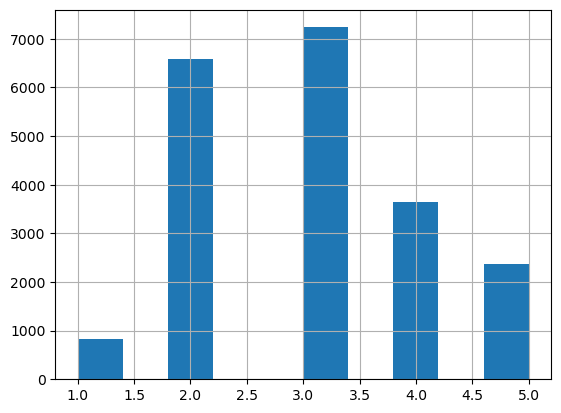

In [16]:
corretora["income_cat"].hist()
plt.show()

Criar uma amostra de extrato, baseado na categoria 'income cat', para isso, será util o `Scikit-Learn`

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in  split.split(corretora, corretora["income_cat"]):
    strat_train_set = corretora.loc[train_index]
    strat_test_set = corretora.loc[test_index]

Bora verificar se funciona, começar olhando para a proporção da categoria de rendimento no conjunto de teste.

In [19]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [20]:
corretora["income_cat"].value_counts()/len(corretora)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

Agora pode apagar a coluna criada, e voltar para os dados originais.

In [21]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

## Visualizar os Dados

Trabalhando somente sobre o **conjunto para teste** , bora criar uma copia para evitar danificar o conjunto de dados original

In [22]:
housing = strat_train_set.copy()

## Dados Geográficos

Como tem dados de latitude e longitude, boa ideia é criar um `scatterplot` de todos os bairros para visualizar os bairros da California

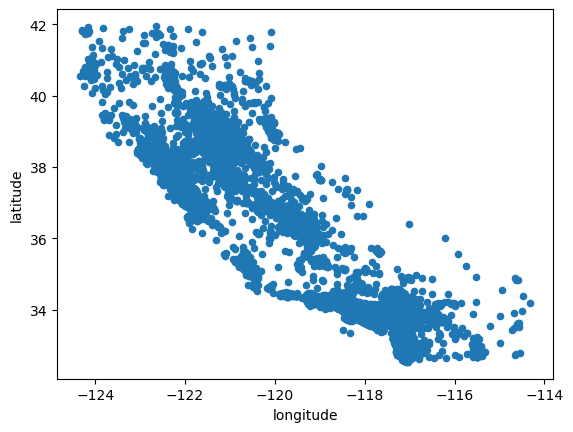

In [23]:
housing.plot(kind='scatter', x="longitude",y="latitude")
plt.show()

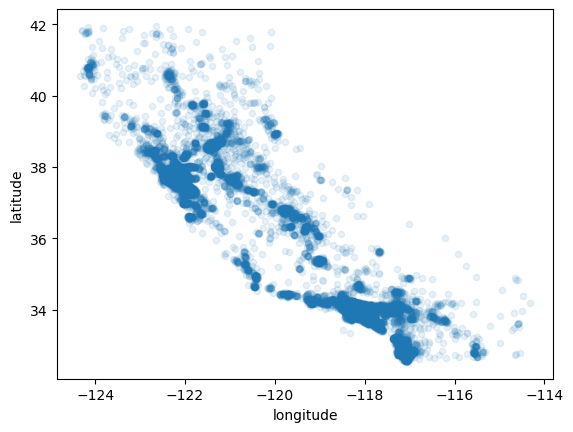

In [24]:
# visualizando a densidade das áreas
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

Bora visualizar  os preços das casas, o radio de cada circulo indica a população de cada bairro, e a cor representa os preços. Usando cores predefinidas para o mapa (opção `cmap`) chamada jet, com intervalos de azul (preços baixos) e vermelhos (preços altos)

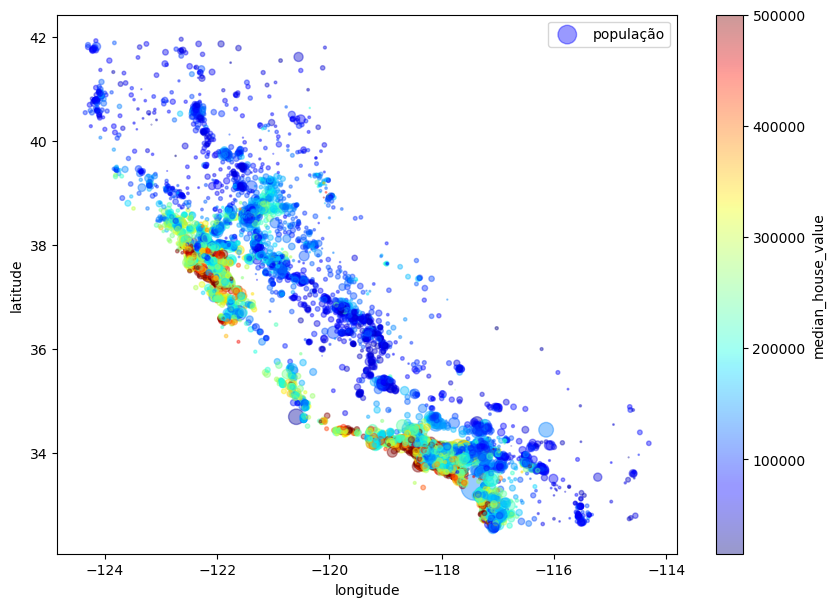

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="população", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

Essa imagem diz muito sobre a localização, e o algoritmo de 'agrupamento'(clustering) será usado.

## Buscando por correlação
Utilizando o coeficiente de correlação padrão, tambem chamado de "Person's r"

Utilizando a função `corr()`

In [26]:
housing_num = housing.drop("ocean_proximity",axis=1)
matriz_corr = housing_num.corr()

In [27]:
matriz_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

**O coeficiente de correlação** vai do interavalo -1 à 1. Quando este está perto do 1, significa que há uma correlação positiva forte, por exemplo o valor da mediano das casas tende a subir quando o rendimento mediano cresce. Quando o coeficiente está perto do -1, significa que há uma correlação negativa forte.E por ultimo, quando os coeficientes estam proximos de zero, significa que não há correlação linear.

Uma outra forma de checar a correlação entre atributos é usando Pandas, `scatter_matrix()`.

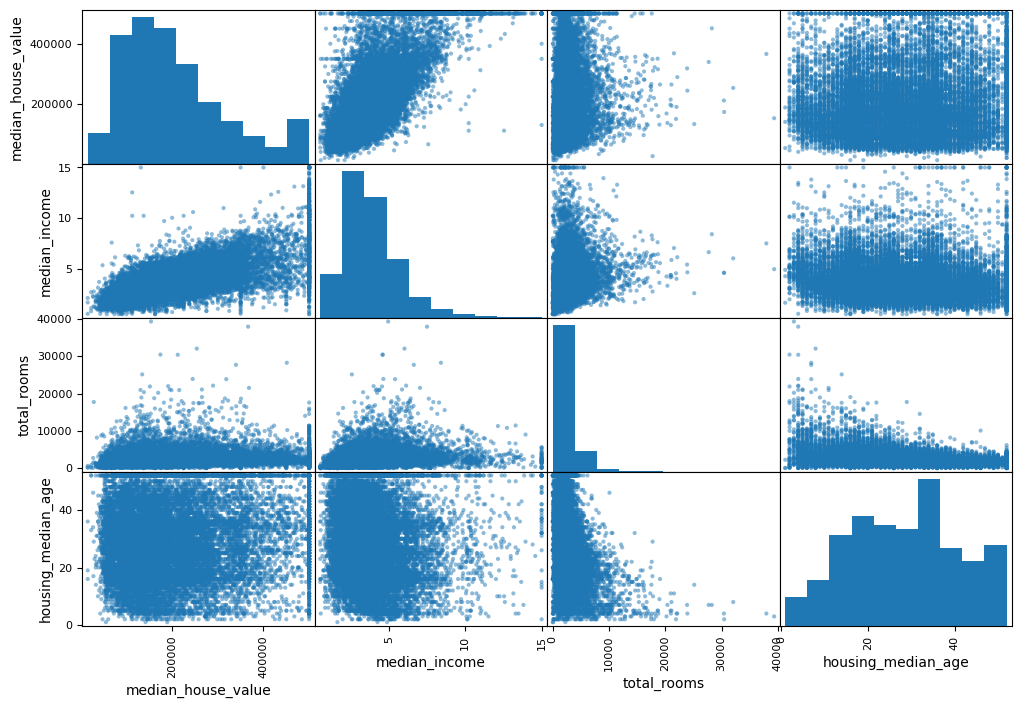

In [28]:
from pandas.plotting import scatter_matrix

atributos = ["median_house_value","median_income","total_rooms",
            "housing_median_age"]
scatter_matrix(housing[atributos],figsize=(12,8))
plt.show()

A diagonal principal não parece muito útil.

Plotar revela alguns atributos promissores para prever o valor mediano do valor das casas.

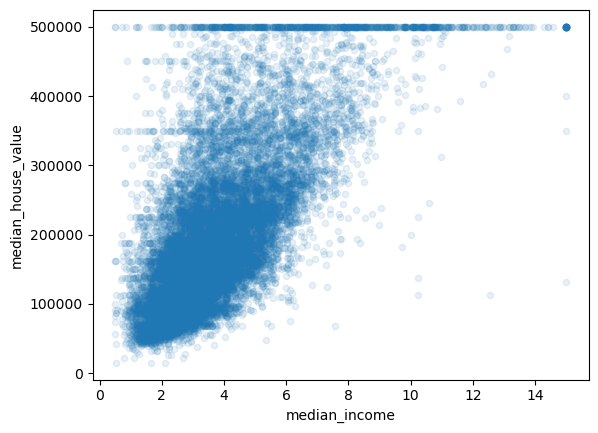

In [29]:
housing.plot(kind='scatter', x="median_income", y="median_house_value",
            alpha=0.1)
plt.show()

Olhando o gráfico, claramente pode-se observar linhas retas, e devem de ser removidas para evitar que o algoritmo reproduça esses dados 'diferenciados'.

## Combinação de Atributos

In [30]:
housing_num["quarto_por_casa"] = housing["total_rooms"] / housing["households"]
housing_num["camas_por_quarto"] = housing["total_bedrooms"]/housing["total_rooms"]
housing_num["pessoas_por_casa"] = housing["population"]/housing["households"]

In [31]:
matriz_corr = housing_num.corr()
matriz_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
quarto_por_casa       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
pessoas_por_casa     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
camas_por_quarto     -0.259952
Name: median_house_value, dtype: float64

# Preparando os dados para o Algoritmo do Machine Learning

Ao invés de faze-lo manualmente, é bom escrever funções para isso, por varias razões:

- Isso irá permitir reproduzir essas transformações fácilmente em qualquer conjunto de dados
- Poder criar gradualmente uma biblioteca de funções que possam ser reutilizáveis em futuros projetos
- Usar as funções no seu sistema para transformar os novos dados antes alimentar os seus algoritmos.
- Isto faz possível para facilitar varias transformações e ver quais transformações funcionam melhor.

Primeiro passo, preparar um conjunto de treinamente claro (fazendo uma cópia do strat_train_set de novo), separando os **indicadores**(fatores de previsão) e os **rótulos**

In [32]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

A maioria dos algoritmos de Machine Learning, não funcionam com elementos em falta, o atributo `total_bedrooms` tem valores faltando.
Há algumas formas de resolver esse problema.

- Eliminar esse dados
- Nominar alguns valores (zero, media, mediana, etc)

Scikit learn tem algumas funções que cuida de dados faltando, especificando que você quer remplazar os atributos faltantes com a mediana.

In [33]:
from sklearn.impute import SimpleImputer

In [41]:
imputer = SimpleImputer(strategy="median")
housing_numerico = housing.drop("ocean_proximity", axis=1)

In [42]:
imputer.fit(housing_numerico)

SimpleImputer(strategy='median')

O `imputer`simplesmente computou a mediana para cada atributo e salvou os resultados numa variável `statistics_`

In [43]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [44]:
housing_numerico.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Agora pode ser adicionado este "treinado" imputer para transformar o conjunto treinado reemplazando os valores que faltam pela mediana.

In [51]:
X = imputer.transform(housing_numerico)

O resultado deste, é uma matriz Numpy contendo as elementos transformados, se quer colocar no pandas: da seguinte forma

In [52]:
housing_tr = pd.DataFrame(X,columns=housing_numerico.columns)


## Resolvendo texto para números

No conjunto de dados  há uma coluna que contém escrita ao invés de números, o sci-kit learn tem uma classe para essas situações

In [55]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [62]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [61]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

Pode-se obter as categorias com a instancia `categories_`, esta é uma lista contendo matriz-coluna

In [60]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

A classificação coerente seria "ruim, medio, bom, excelente", olhando para as categories, o 0=ocean e 4=near ocean, faz mais setido do que 0=ocean e 1=inland. Para resolver esse problema, ordenando da forma apropriada, é chamada de `one-hot encoding`, porque só um atributo será '1'(hot) e os demais serão '0'(cold)

In [63]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [64]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [66]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Transformadores personalizados

É preciso transformadores, para tarefas de limpeza personalizada ou combinação específica de atributos. Para isso, será criado uma classe e implementar três métodos: `fit()`, `transform()`,`fit_transform()`

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [68]:
class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self,X, y=None):
        rooms_per_houselhold = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_houselhold, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_houselhold, population_per_household]

In [69]:
attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Escalonamento

Uma importante transformação necessário para os dados, é `feature scaling`. Machine learning não funciona bem, quando os atributos tem diferentes escalas. Por exemplo, o total de quartos, vai do 6-39,320, enquanto o rendimento mediano vai do 0-15. Há duas formas de solução:
- min-max scaling. (escalonamento)
- standardization (padronização)

## Canais de Transformação

Há muitos passos para transformar dados, e eles precisam seguir uma ordem adequada. Scikit Learn tem um class 'canais' `pipelines class` que é uma mão na roda.


In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [73]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombineAttributesAdder()),
    ("std_scaler", StandardScaler())
])

In [75]:
housing_num_tr = num_pipeline.fit_transform(housing_numerico)

In [77]:
from sklearn.compose import ColumnTransformer

In [79]:
num_attribs = list(housing_numerico)
cat_attribs = ["ocean_proximity"]

In [80]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)

# Selecionar e Treinar um  Modelo 

## Treinando e avaliando um conjunto de treinamento (dados)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [89]:
alguns_dados = housing.iloc[:5]
alguns_rotulos = housing_labels.iloc[:5]
algum_dado_prep = full_pipeline.transform(alguns_dados)

In [93]:
print("Pronóstico:", lin_reg.predict(algum_dado_prep))

Pronóstico: [ 86208. 304704. 153536. 185728. 244416.]


In [95]:
print("Labels:", list(alguns_rotulos))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Medindo o RMSE (erro médio quadrático) deste modelo de regressão, utilizando a função `mean_squared_error`

In [97]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68633.40810776998

Isso é melhor do que nada, mas a maioria dos bairros tem uma média de valor das casas,entre 120K dólares e 265K dólares.

Pronosticar 68K, não parece ser muito legal. Esse é um exemplo de modelo "underfitting" que não generaliza. Significa que não foi providenciada suficiente informação como para fazer uma boa estimativa. É possível adicionar mais opções para melhorar os pronósticos. 

Será utilizado outro modelo, o modelo "DecisionTreeRegressor", um modelo capz de encontrar relações não lineares complexas nos dados.

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [100]:
# ja foi treinado, agora bora dar uma olhada nos resultados
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Zero erro, 👀, será? 

Não precisa tocar no **conjunto de teste** até que esteja preparado para utilizar o modelo de forma confidente, por isso que foi só usado o *conjunto de treinamento*, para validar o modelo.

## Cross-Validation

Uma forma de avaliar o modelo é utilizando  a função `train_test_split` para separar o conjunto de treinamento em pequenos conjuntos e valida-los.

Uma alternativa é utilizar o recurso do Scikit Learn, `K-fold cross-validation`

In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

O recurso cross-validation do Scikit Learn espera uma função de utilidade (maior é melhor) ao invés de uma função de custo (menor é melhor), então a função `score`é na verdade o oposto de MSE (erro padrão), por isso o valor negativo (-scores) antes de calcular a raiz quadrada.

In [103]:
def display_scores(scores):
    print("pontuação:", scores)
    print("média:", scores.mean())
    print("Desvio padrão:", scores.std())

In [104]:
display_scores(tree_rmse_scores)

pontuação: [72904.22001286 69277.13997622 68434.99740941 69737.99863824
 71259.03784292 76104.0496478  70707.31880142 74497.29952734
 68190.04925118 71338.52120381]
média: 71245.06323111881
Desvio padrão: 2461.9349274218757


Parece que esse modelo é menos bom do que a regressão Linear, este marcou aproximadamente 71K, com $\pm$2461

In [105]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

pontuação: [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
média: 69116.4347200802
Desvio padrão: 2880.6588594759014
